In [8]:
import numpy as np
from os.path import expanduser
import os
import json
import theano
import pyret.filtertools as ft
import pyret.visualizations as pyviz
from keras.models import model_from_json
import h5py
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
%matplotlib inline
#%matplotlib qt

from pylab import rcParams
rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
rcParams['image.interpolation'] = 'nearest'
rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
# deep retina imports
import visualizations as viz
from preprocessing import datagen, loadexpt
from utils import load_model

In [4]:
# model trained on white noise
natural_model_path = expanduser('~/Dropbox/deep-retina/saved/lenna.nirum/2015-12-13 00.27.52 convnet/')
natural_weight_name = 'epoch098_iter07000_weights.h5'
natural_multimodel = load_model(natural_model_path, natural_weight_name)

# model trained on natural scenes
white_model_path = expanduser('~/Dropbox/deep-retina/saved/lenna.nirum/2015-12-13 23.20.03 convnet/')
white_weight_name = 'epoch097_iter06950_weights.h5'
white_multimodel = load_model(white_model_path, white_weight_name)

### Get held-out correlation coefficients for each cell individually

In [5]:
naturalscenes_test = loadexpt([0,1,2,3,4], 'naturalscene', 'test', 40)
whitenoise_test = loadexpt([0,1,2,3,4], 'whitenoise', 'test', 40)

Loading testing data... Done.
Loading testing data... Done.


In [6]:
whitenoise_truth = []
naturalscenes_truth = []
whitenoise_on_whitenoise = []
whitenoise_on_naturalscenes = []
naturalscenes_on_whitenoise = []
naturalscenes_on_naturalscenes = []

#### White noise

In [6]:
for X, y in datagen(50, *whitenoise_test):
    whitenoise_truth.extend(y)
    whitenoise_on_whitenoise.extend(white_multimodel.predict(X))
    naturalscenes_on_whitenoise.extend(natural_multimodel.predict(X))

In [7]:
whitenoise_truth = np.array(whitenoise_truth)
whitenoise_on_whitenoise = np.array(whitenoise_on_whitenoise)

In [8]:
whitenoise_truth.shape

(5950, 5)

In [9]:
whitenoise_on_whitenoise.shape

(5950, 5)

In [16]:
whitenoise_test_cc = []
for c in range(5):
    whitenoise_test_cc.append(pearsonr(whitenoise_truth[:,c], whitenoise_on_whitenoise[:,c])[0])
    print whitenoise_test_cc[-1]

0.71307593374
0.595419152601
0.597505528895
0.759430525623
0.657418143471


#### Natural Scenes

In [11]:
for X, y in datagen(50, *naturalscenes_test):
    naturalscenes_truth.extend(y)
    whitenoise_on_naturalscenes.extend(white_multimodel.predict(X))
    naturalscenes_on_naturalscenes.extend(natural_multimodel.predict(X))

In [20]:
naturalscenes_truth = np.array(naturalscenes_truth)
whitenoise_on_naturalscenes = np.array(whitenoise_on_naturalscenes)
naturalscenes_on_naturalscenes = np.array(naturalscenes_on_naturalscenes)

In [21]:
naturalscenes_test_cc = []
for c in range(5):
    naturalscenes_test_cc.append(pearsonr(naturalscenes_truth[:,c], naturalscenes_on_naturalscenes[:,c])[0])
    print naturalscenes_test_cc[-1]

0.554897368714
0.408830967164
0.448623911001
0.515086977577
0.567501401348


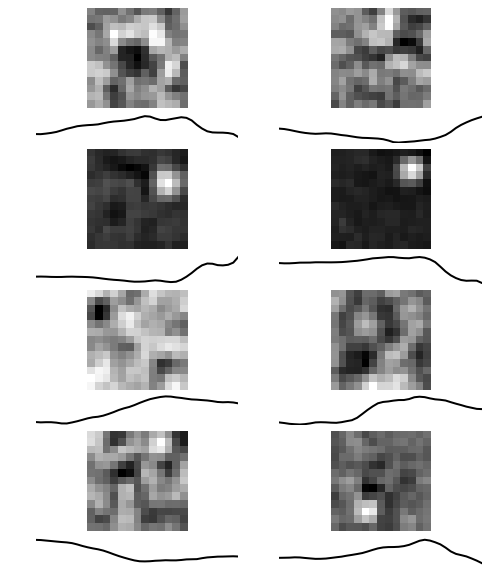

In [22]:
naturalscenes_weights = h5py.File(natural_model_path + natural_weight_name, 'r')
naturalscenes_W0 = naturalscenes_weights['layer_0']['param_0']
viz.visualize_convnet_weights(naturalscenes_W0, title='convnet', fig_size=(8,10), dpi=500, space=True, time=True, 
                              display=True, save=False)

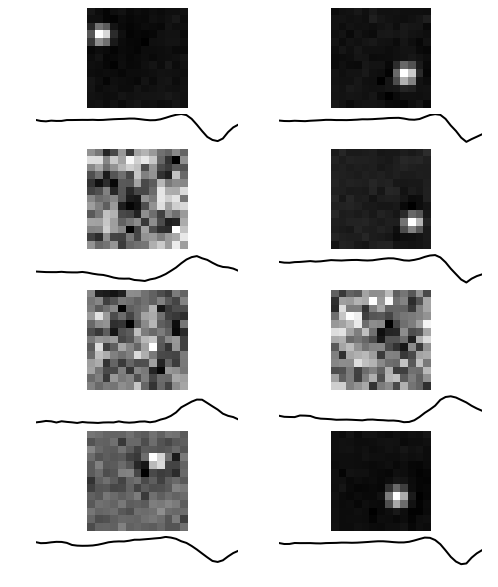

In [23]:
whitenoise_weights = h5py.File(white_model_path + white_weight_name, 'r')
whitenoise_W0 = whitenoise_weights['layer_0']['param_0']
viz.visualize_convnet_weights(whitenoise_W0, title='convnet', fig_size=(8,10), dpi=500, space=True, time=True, 
                              display=True, save=False)

In [28]:
list(naturalscenes_weights['layer_4'])

[u'param_0', u'param_1']

In [10]:
natural_sta_layer1 = viz.get_sta(natural_multimodel, 4)

AssertionError: 

In [7]:
naturalscenes_multimodel.predict(np.random.randn(1,40,50,50))

array([[ 6.22887945,  1.90983856,  1.91682184,  7.16639328,  0.41306093]])